In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import neattext.functions as nfx
import sklearn
import joblib

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [2]:
#Load the dataset
df = pd.read_csv("../data/eng_dataset.csv")

In [3]:
df.head()

,ID,sentiment,content
0,10941,anger,At the point today where if someone says somet...
1,10942,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,10943,anger,This game has pissed me off more than any othe...
3,10944,anger,@spamvicious I've just found out it's Candice ...
4,10945,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...


In [6]:
# Check shape
print("Dataset shape:", df.shape)

# Check column names
print("Columns:", df.columns.tolist())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check data types
print("Data types:\n", df.dtypes)



Dataset shape: (7102, 3)
Columns: ['ID', 'sentiment', 'content']
Missing values:
 ID           0
sentiment    0
content      0
dtype: int64
Data types:
 ID            int64
sentiment    object
content      object
dtype: object


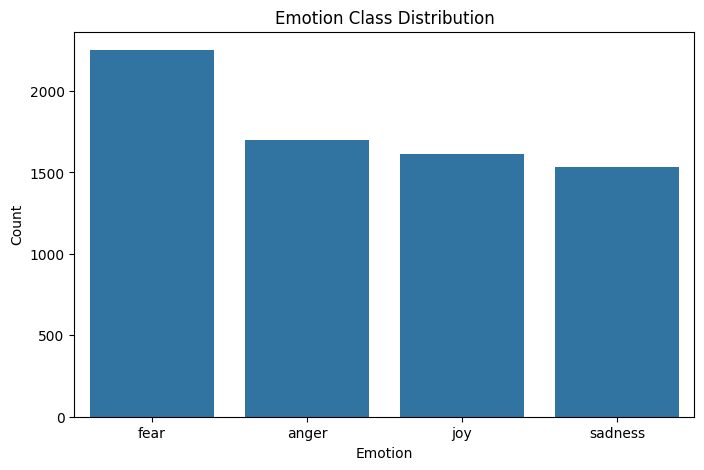

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot emotion class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index)
plt.title("Emotion Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()


In [8]:
# Unique emotion classes
emotions = df['sentiment'].unique()

# Display 3 sample texts from each emotion
for emotion in emotions:
    print(f"\nSamples for emotion: {emotion}")
    print(df[df['sentiment'] == emotion]['content'].dropna().sample(3, random_state=42).to_list())



Samples for emotion: anger
["oh these old things on my face? nah they're not tears from school related anger and frustration nope never", '#ForgivenessÂ might make us look #weak, but the weakest person is the one who holds #anger, #hatred, and .', 'Oh daaaaaaamn @SophiaBush! #getitgirl #girlpower  #rawr #ChicagoPD']

Samples for emotion: fear
["@BritishBakeOff Val's 'soggy bottom' face will haunt me. Stay strong V-dog!", 'Will you #dedicate today to #love or #fear ? It is your #choice in each #moment . - Archangel Michael. #archangel #michael', "@TheSidEudy PS: I still think your broken leg against Scott Steiner was one of the most horrific injuries I've ever seen in the ring #ccot"]

Samples for emotion: joy
['Could not be happier!! ', 'I take a strange delight from seeing mark Hughes struggle', "I'm such a fan of endless #laughter with #friends and enjoying #happiness together. #FridayFeeling #weekend"]

Samples for emotion: sadness
['Condolences to the  JC and the Georges family.. 

In [10]:
import neattext.functions as nfx

# Work on a copy of the DataFrame
df_cleaned = df.copy()

# Convert text to lowercase
df_cleaned['cleaned_text'] = df_cleaned['content'].str.lower()

# Remove stopwords
df_cleaned['cleaned_text'] = df_cleaned['cleaned_text'].apply(nfx.remove_stopwords)

# Remove punctuations
df_cleaned['cleaned_text'] = df_cleaned['cleaned_text'].apply(nfx.remove_punctuations)

# Remove URLs
df_cleaned['cleaned_text'] = df_cleaned['cleaned_text'].apply(nfx.remove_urls)

# Remove special characters
df_cleaned['cleaned_text'] = df_cleaned['cleaned_text'].apply(nfx.remove_special_characters)

# (Optional) Remove emojis if needed
df_cleaned['cleaned_text'] = df_cleaned['cleaned_text'].apply(nfx.remove_emojis)

# Show before and after cleaning
df_cleaned[['content', 'cleaned_text']].head(10)


,content,cleaned_text
0,At the point today where if someone says somet...,point today says remotely kind me waterfall bu...
1,@CorningFootball IT'S GAME DAY!!!! T MIN...,corningfootball game day minus 1430 relentless
2,This game has pissed me off more than any othe...,game pissed game year blood boiling time turn ...
3,@spamvicious I've just found out it's Candice ...,spamvicious ive found candice candace pout likes
4,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,moocowward mrsajhargreaves melly77 garybarlow ...
5,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,moocowward mrsajhargreaves melly77 garybarlow ...
6,wanna go home and focus up on this game . Don'...,wanna home focus game wanna rage
7,@virginmedia I've been disconnected whilst on ...,virginmedia ive disconnected whilst holiday h...
8,@virginmedia I've been disconnected whilst on ...,virginmedia ive disconnected whilst holiday h...
9,I wanna see you smile I don't wanna see you ma...,wanna smile wanna frown


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use lemmatized_text if it worked; otherwise, use cleaned_text
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform
X = tfidf.fit_transform(df_cleaned['cleaned_text'])  # using cleaned_text
y = df_cleaned['sentiment']  # target labels



In [24]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)


Accuracy: 0.8733286418015482

Classification Report:
               precision    recall  f1-score   support

       anger       0.92      0.88      0.90       340
        fear       0.80      0.94      0.87       451
         joy       0.95      0.88      0.91       323
     sadness       0.87      0.75      0.81       307

    accuracy                           0.87      1421
   macro avg       0.89      0.86      0.87      1421
weighted avg       0.88      0.87      0.87      1421



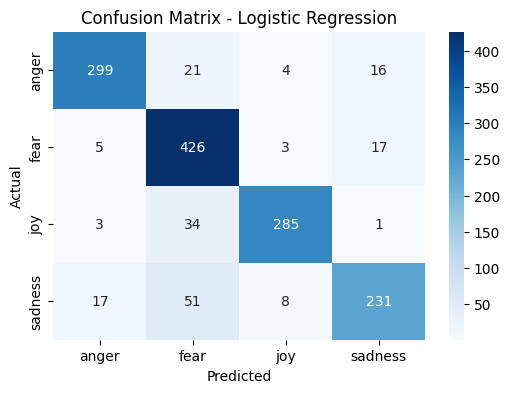

In [26]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix (Visual)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [27]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8388458831808585

Classification Report:
               precision    recall  f1-score   support

       anger       0.88      0.84      0.86       340
        fear       0.76      0.94      0.84       451
         joy       0.94      0.85      0.89       323
     sadness       0.84      0.67      0.75       307

    accuracy                           0.84      1421
   macro avg       0.86      0.83      0.84      1421
weighted avg       0.85      0.84      0.84      1421



In [28]:
from sklearn.svm import LinearSVC

# Initialize and train the model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8937368050668544

Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.91      0.92       340
        fear       0.85      0.94      0.89       451
         joy       0.97      0.91      0.94       323
     sadness       0.85      0.80      0.82       307

    accuracy                           0.89      1421
   macro avg       0.90      0.89      0.89      1421
weighted avg       0.90      0.89      0.89      1421



In [29]:
models = {
    "Logistic Regression": log_reg,
    "Naive Bayes": nb_model,
    "SVM": svm_model
}

for name, model in models.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8733
Naive Bayes Accuracy: 0.8388
SVM Accuracy: 0.8937


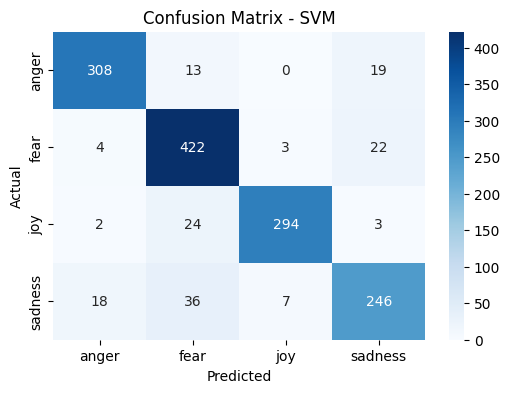

Classification Report - SVM:
               precision    recall  f1-score   support

       anger       0.93      0.91      0.92       340
        fear       0.85      0.94      0.89       451
         joy       0.97      0.91      0.94       323
     sadness       0.85      0.80      0.82       307

    accuracy                           0.89      1421
   macro avg       0.90      0.89      0.89      1421
weighted avg       0.90      0.89      0.89      1421



In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_model.classes_,
            yticklabels=svm_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# Classification report (again, optional)
print("Classification Report - SVM:\n", classification_report(y_test, y_pred_svm))


In [32]:
import os

# Create the models folder if it doesn't exist
os.makedirs("../models", exist_ok=True)


In [33]:
import joblib

# Save the best model (SVM)
joblib.dump(svm_model, "../models/emotion_model.joblib")

# Save the TF-IDF vectorizer
joblib.dump(tfidf, "../models/tfidf_vectorizer.joblib")

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


In [34]:
import joblib

# Save the best model (SVM)
joblib.dump(svm_model, "../models/emotion_model.joblib")

# Save the TF-IDF vectorizer
joblib.dump(tfidf, "../models/tfidf_vectorizer.joblib")

print("✅ Model and vectorizer saved successfully!")

✅ Model and vectorizer saved successfully!
